# Comparing rank aggregation algorithms with PyFLAGR

## Introduction

The fusion of multiple ranked lists of elements into a single aggregate list is a well-studied research field with numerous applications in Bioinformatics, recommendation systems, collaborative filtering, election systems and metasearch engines.

FLAGR is a high performance, modular, open source C++ library for rank aggregation problems. It implements baseline and recent state-of-the-art aggregation algorithms that accept ranked preference lists and generate a single consensus list of elements. A portion of these methods apply exploratory analysis techniques and belong to the broad family of unsupervised learning techniques.

## Installation

PyFLAGR is a Python library built on top of FLAGR library core. It can be easily installed with pip:

``pip install pyflagr``

After installation, PyFLAGR can be used in standard Python programs and Jupyter notebooks. Representative code examples can be found on this notebook.

## Downloads, Documentation, Version and License

* The source code of FLAGR and PyFLAGR is available through the [official GitHub repository](https://github.com/lakritidis/FLAGR).
* The library is fully documented at [https://flagr.site/](https://flagr.site/).
* The current (Py)FLAGR version is 1.0.8.
* Both libraries are licensed under the [Apache License, version 2](http://www.apache.org/licenses/LICENSE-2.0).

## Importing and using PyFLAGR

PyFLAGR groups its supported rank aggregation methods in 6 modules:

1. `Linear`: This module contains the `CombSUM`, `CombMNZ`, `Borda` and `SimpleBorda` classes. `CombSUM` and `CombMNZ` support five normalization methods (see Renda et al., 2003). `Borda` and `SimpleBorda` are just wrappers of `CombSUM` with `borda` and `simple-borda` normalization.
2. `Majoritarian`: Includes `CondorcetWinners`, `CopelandWinners` and `OutrankingApproach` (Outranking Approach of Farah and Vanderpooten 2007).
3. `MarkovChains`: Implements the four Markov Chains methods of Dwork et. al, 2001 and the MCT variant of DeConde et al. 2006.
4. `Kemeny`: Includes `KemenyOptimal` (Kemeny Optimal Aggregation).
5. `RRA`: Includes `RobustRA` (Robust Rank Aggregation of Kolde et al., 2012 in two variants).
6. `Weighted`: This module implements several self-weighting rank aggregation methods. These methods automatically identify the expert voters and include:
 1. The Preference Relations Graph method of Desarkar et al., 2016.
 2. The Agglomerative method of Chatterjee et al., 2018.
 3. The Iterative, Distance-Based method of Akritidis et al., 2022.


In [1]:
# Import the PyFLAGR modules for rank aggregation
import pyflagr.Linear as Linear
import pyflagr.Majoritarian as Majoritarian
import pyflagr.MarkovChains as MarkovChains
import pyflagr.Kemeny as Kemeny
import pyflagr.RRA as RRA
import pyflagr.Weighted as Weighted
import pyflagr.Comparator as Comparator


## Input/Output files

Please refer to [this article](http://flagr.site/docs/38/input-and-output-files) for a detailed description of the format of the input and output files.

Here we use an example data file that contains the input lists to be aggregated. More specifically, `testdata.csv` includes the lists that were submitted by $v=50$ voters for $Q=20$ queries. Each input list contains $k=30$ elements. Therefore, the number of rows in this file is equal to $50 \cdot 20 \cdot 30 = 30000$.

In addition, the user must provide a second input file (we call it the *Rels* file) that contains relevance judgments for the preference list elements of the primary input file for each query. This file is essential for evaluatingrank aggregation methods.


In [2]:
# The input data file with the input lists to be aggregated.
lists = 'testdata.csv'

# The input data file with the relevance judgements.
qrels = 'testdata_qrels.csv'


## The `Comparator` class

This notebook demonstrates the PyFLAGR's tools for testing and comparing rank aggregation methods. Code examples that show how each method can be executed and evaluated individually are presented in the first notebook entitled `CodeExamples.ipynb`. Here we present the `Comparator` class and its member methods.

### Constructor

The constructor receives a single argument that represents the cutoff point (termed *evaluation points*) at which the evaluation metrics will be computed. In the following example, we determine that the cutoff point is $10$, therefore, the following metrics will be computed:

* Mean Average Precision (MAP),
* Precision at points $1,2,...10$ (namely, $P@1,P@2,...P@N$),
* Recall at points $1,2,...10$ (namely, $R@1,R@2,...R@N$),
* Discounted Cumulative Gain, DCG (namely, $D@1,D@2,...D@N$), and
* normalized Discounted Cumulative Gain, nDCG (namely, $N@1,N@2,...N@N$).


In [3]:
EV_PTS = 10

cmp = Comparator.Comparator(EV_PTS)


### The `aggregators` array and the `add_aggregator` member function

The class contains an `aggregators` array that stores the rank aggregation methods to be compared. Each method is handled by a particular object that is passed to `Comparator` through the `add_aggregator` method. 

Notice that the `eval_pts` parameter that is passed to each class constructor must be equal to the aforementioned value of the cutoff parameter. In the following example, we pass 20 rank aggregation methods to `Comparator`:


In [4]:
cmp.add_aggregator("CombSUM-Rank", Linear.CombSUM(norm='rank', eval_pts=EV_PTS))
cmp.add_aggregator("CombSUM-Borda", Linear.CombSUM(norm='borda', eval_pts=EV_PTS))
cmp.add_aggregator("CombSUM-Score", Linear.CombSUM(norm='score', eval_pts=EV_PTS))
cmp.add_aggregator("CombMNZ-Rank", Linear.CombMNZ(norm='rank', eval_pts=EV_PTS))
cmp.add_aggregator("CombMNZ-Borda", Linear.CombMNZ(norm='borda', eval_pts=EV_PTS))
cmp.add_aggregator("CombMNZ-Score", Linear.CombMNZ(norm='score', eval_pts=EV_PTS))
cmp.add_aggregator("Condorcet", Majoritarian.CondorcetWinners(eval_pts=EV_PTS))
cmp.add_aggregator("Copeland", Majoritarian.CopelandWinners(eval_pts=EV_PTS))
cmp.add_aggregator("Outranking Approach", Majoritarian.OutrankingApproach(preference=0, veto=0.75, concordance=0,
                                                                          discordance=0.25, eval_pts=EV_PTS))
cmp.add_aggregator("MC1", MarkovChains.MC1(max_iterations=50, ergodic_number=0.15, eval_pts=EV_PTS))
cmp.add_aggregator("MC2", MarkovChains.MC2(max_iterations=50, ergodic_number=0.15, eval_pts=EV_PTS))
cmp.add_aggregator("MC3", MarkovChains.MC3(max_iterations=50, ergodic_number=0.15, eval_pts=EV_PTS))
cmp.add_aggregator("MC4", MarkovChains.MC4(max_iterations=50, ergodic_number=0.15, eval_pts=EV_PTS))
cmp.add_aggregator("MCT", MarkovChains.MCT(max_iterations=50, ergodic_number=0.15, eval_pts=EV_PTS))
cmp.add_aggregator("RRA-Exact", RRA.RRA(exact=True, eval_pts=EV_PTS))
cmp.add_aggregator("RRA", RRA.RRA(exact=False, eval_pts=EV_PTS))
cmp.add_aggregator("PrefRel", Weighted.PreferenceRelationsGraph(alpha=0.1, beta=0.5, eval_pts=EV_PTS))
cmp.add_aggregator("Agglomerative", Weighted.Agglomerative(c1=0.1, c2=0.2, eval_pts=EV_PTS))
cmp.add_aggregator("DIBRA", Weighted.DIBRA(aggregator='combsum:borda', gamma=1.2, prune=False, w_norm='minmax',
                                           eval_pts=EV_PTS))
cmp.add_aggregator("DIBRA-Prune", Weighted.DIBRA(aggregator='combsum:borda', gamma=1.2, prune=True, w_norm='minmax',
                                                 d1=0.3, d2=0.05, eval_pts=EV_PTS))

### The `aggregate` member function

Then, the `aggregate` method is called by passing:
* The input data file that contains the preference lists to be aggregated, and
* The Rels file that contains relevance judgments for the elements of the preference lists. This is the ground truth file that will be used to evaluate the generated aggregate lists.

Again, please refer to [this article](http://flagr.site/docs/38/input-and-output-files) for a detailed description of the format of the input and output files.


In [5]:
cmp.aggregate(input_file=lists, rels_file=qrels)


Running CombSUM-Rank ...
Running CombSUM-Borda ...
Running CombSUM-Score ...
Running CombMNZ-Rank ...
Running CombMNZ-Borda ...
Running CombMNZ-Score ...
Running Condorcet ...
Running Copeland ...
Running Outranking Approach ...
Running MC1 ...
Running MC2 ...
Running MC3 ...
Running MC4 ...
Running MCT ...
Running RRA-Exact ...
Running RRA ...
Running PrefRel ...
Running Agglomerative ...
Running DIBRA ...
Running DIBRA-Prune ...


### The `results` Dataframe

The evaluation results are stored in the `results` member of `Comparator`. Each row in this Dataframe represents the performance of an algorithm for a particular query. There is also one additional row per method, that records its average performance for all queries. In this particular example, we have $20$ rank aggregation methods and $20$ queries, consequently, the `results` Dataframe contains $20 \cdot (20+1) = 420$ rows.

The number of columns in the `results` Dataframe depends on the value of the cutoff point that we set during the construction of `Comparator`. In this example this value is $10$, so the Dataframe has $46$ columns:
* 1 column that represents the query string,
* 1 column that represents the length (i.e. the number of elements in the) aggregate list,
* 1 column for the total number of relevant elements for this query,
* 1 column for the number of relevant elements included in the aggregate list,
* 1 column for the Average Precision of a method for this query,
* 10 columns for Precision (at 10 points in the aggregate list),
* 10 columns for Recall (at 10 points in the aggregate list),
* 10 columns for DCG (at 10 points in the aggregate list),
* 10 columns for nDCG (at 10 points in the aggregate list),
* 1 column for the method's name


In [17]:
cmp.results


,q,num_ret,num_rel,num_rel_ret,Mean Average Precision (MAP),P_1,P_2,P_3,P_4,P_5,...,ndcg_cut_2,ndcg_cut_3,ndcg_cut_4,ndcg_cut_5,ndcg_cut_6,ndcg_cut_7,ndcg_cut_8,ndcg_cut_9,ndcg_cut_10,Method
0,Topic 1,100,48,48,0.534255,1.00,1.00,0.666667,0.5000,0.40,...,1.000000,0.765361,0.636682,0.553146,0.493523,0.539929,0.496846,0.532447,0.498572,CombSUM-Rank
1,Topic 2,100,46,46,0.539673,0.00,0.50,0.666667,0.5000,0.40,...,0.386853,0.530721,0.441492,0.383566,0.450011,0.500404,0.540269,0.572798,0.536356,CombSUM-Rank
2,Topic 3,100,40,40,0.442181,1.00,1.00,0.666667,0.5000,0.40,...,1.000000,0.765361,0.636682,0.553146,0.493523,0.448304,0.492326,0.528247,0.558260,CombSUM-Rank
3,Topic 4,100,40,40,0.427771,0.00,0.00,0.000000,0.2500,0.20,...,0.000000,0.000000,0.168128,0.146068,0.130324,0.210008,0.273045,0.253726,0.301204,CombSUM-Rank
4,Topic 5,100,54,54,0.656236,1.00,1.00,1.000000,1.0000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.920205,0.855096,0.864315,CombSUM-Rank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Topic 17,100,48,48,0.554552,1.00,0.50,0.333333,0.5000,0.60,...,0.613147,0.469279,0.558508,0.616434,0.549989,0.591221,0.623840,0.579699,0.606439,DIBRA-Prune
17,Topic 18,99,39,39,0.483414,0.00,0.50,0.333333,0.5000,0.40,...,0.386853,0.296082,0.414430,0.360055,0.321245,0.291810,0.348320,0.394430,0.432957,DIBRA-Prune
18,Topic 19,100,45,45,0.495182,0.00,0.50,0.333333,0.5000,0.60,...,0.386853,0.296082,0.414430,0.491260,0.546096,0.587686,0.620586,0.647432,0.606242,DIBRA-Prune
19,Topic 20,99,45,45,0.457854,0.00,0.00,0.333333,0.2500,0.40,...,0.000000,0.234639,0.195190,0.300785,0.268364,0.335400,0.308637,0.357555,0.398428,DIBRA-Prune


### Retrieving the evaluation results with `get_results`

The `get_results` method can be used to easily retrieve slices of the `results` Dataframe. In the following example, we get the mean values of MAP, Precision and nDCG for all queries, and for each method.


In [10]:

df = cmp.get_results(cutoff=5, metric=["map", "precision", "ndcg"], query='all')

print(df.shape)
df.style.format(precision=4)

(20, 11)


,Mean Average Precision (MAP),P_1,P_2,P_3,P_4,P_5,ndcg_cut_1,ndcg_cut_2,ndcg_cut_3,ndcg_cut_4,ndcg_cut_5
Method,,,,,,,,,,,
CombSUM-Rank,0.4855,0.4500,0.4750,0.4167,0.4500,0.4400,0.4500,0.4693,0.4296,0.4498,0.4433
CombSUM-Borda,0.4836,0.5000,0.4750,0.4167,0.4250,0.4200,0.5000,0.4807,0.4383,0.4402,0.4350
CombSUM-Score,0.4854,0.4000,0.4750,0.4500,0.4625,0.4400,0.4000,0.4580,0.4444,0.4538,0.4401
CombMNZ-Rank,0.4853,0.5000,0.5000,0.4167,0.4375,0.4100,0.5000,0.5000,0.4413,0.4512,0.4314
CombMNZ-Borda,0.4849,0.5500,0.4500,0.4833,0.5000,0.4700,0.5500,0.4726,0.4908,0.5007,0.4810
CombMNZ-Score,0.4848,0.5000,0.5000,0.4167,0.4375,0.4100,0.5000,0.5000,0.4413,0.4512,0.4314
Condorcet,0.4801,0.5000,0.4750,0.4333,0.4125,0.4300,0.5000,0.4807,0.4500,0.4332,0.4420
Copeland,0.4820,0.5000,0.4500,0.4167,0.4000,0.4100,0.5000,0.4613,0.4352,0.4209,0.4247
Outranking Approach,0.4817,0.5000,0.4250,0.4333,0.4125,0.4400,0.5000,0.4420,0.4439,0.4281,0.4441


### Converting to LaTeX

The `convert_to_latex` method can be used to convert the acquired results to a LaTeX tabular construct:


In [20]:
latex_code = cmp.convert_to_latex(dec_pts=4, cutoff=EV_PTS, metric=["map", "precision", "ndcg"], query='all')
# print(latex_code)


C:\Users\Leo\anaconda3\lib\site-packages\pyflagr\Comparator.py:118: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.get_results(cutoff, metric, query).round(dec_pts).to_latex()


### Plots: Mean Average Precision

There are two types of plots in `Comparator`. The first one creates a bar plot of the Mean Average Precision of all methods:

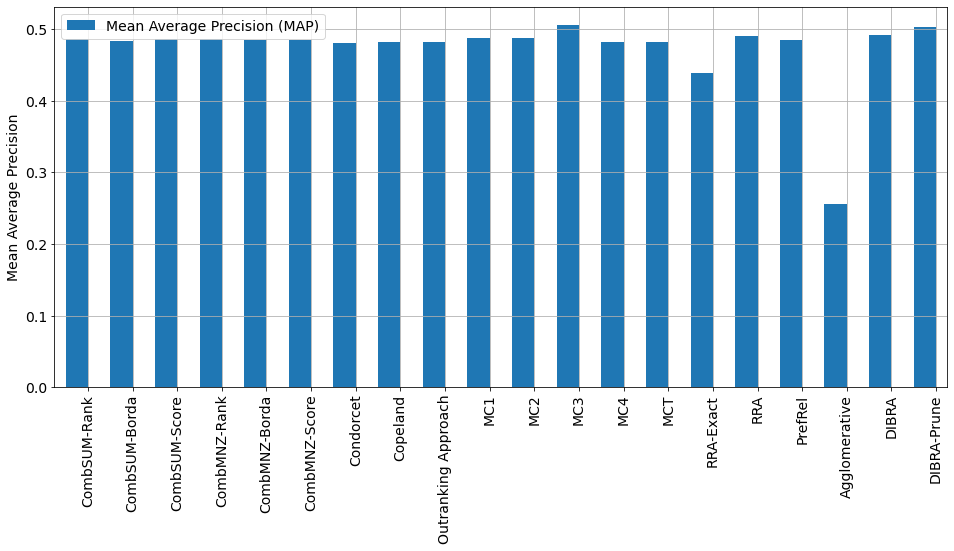

In [21]:
cmp.plot_average_precision((16, 7), True, query='all')


### Plots: Evaluation measures at specific cutoff points

The `plot_metric` method can be used to plot the value of a particular metric at specific cutoff points. The `metric` argument takes as values:
* `precision`
* `recall`
* `dcg`
* `ndcg`

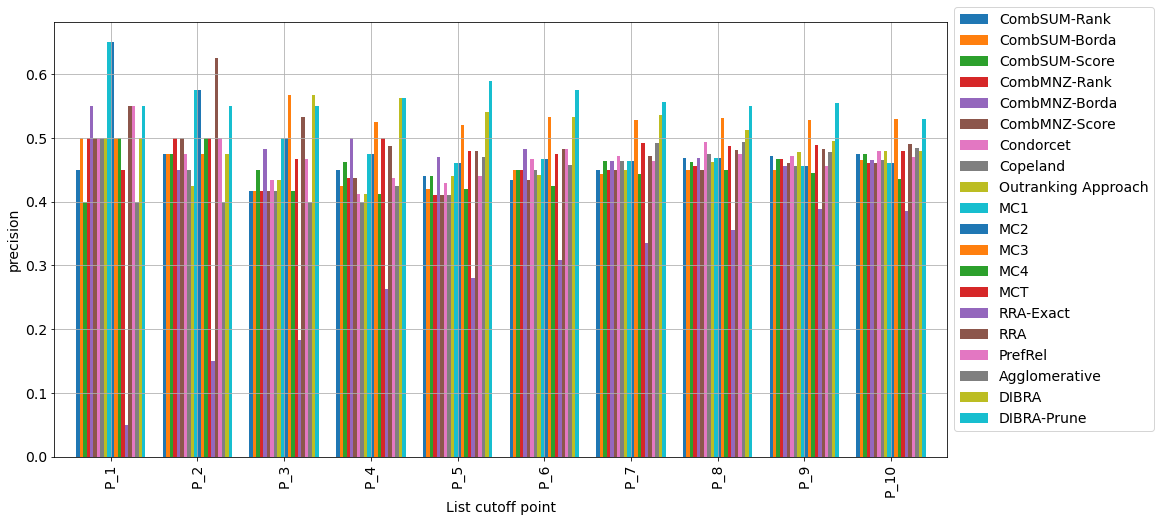

In [22]:
cmp.plot_metric(EV_PTS, metric='precision', plot_type='bar', dimensions=(16,8), show_grid=True, query='all')


The `plot_type` parameter can be either `bar`, or `line`:

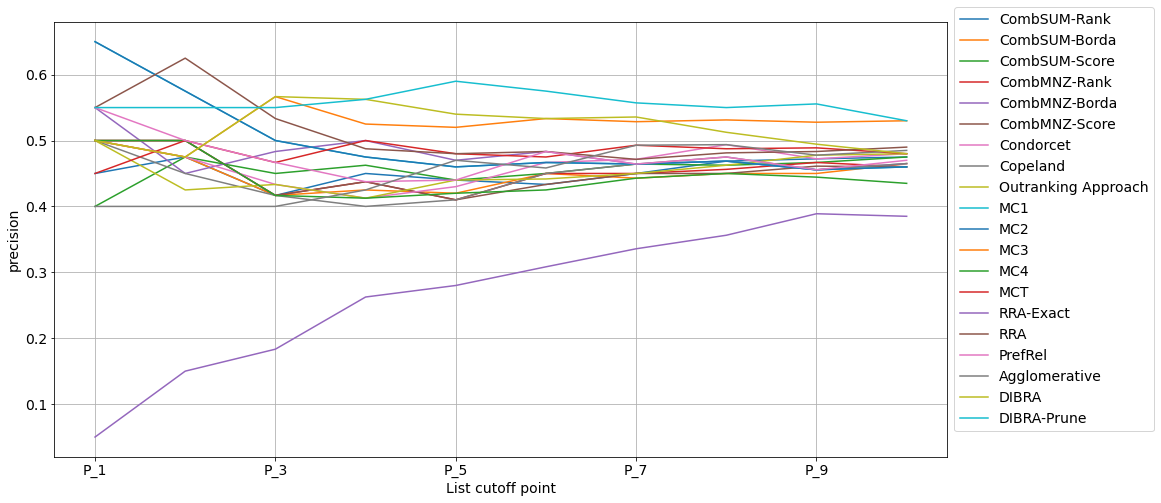

In [23]:
cmp.plot_metric(EV_PTS, metric='precision', plot_type='line', dimensions=(16,8), show_grid=True, query='all')
